載入模組

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')##出現提示欄進行授權
os.chdir('/content/drive/My Drive/Colab Notebooks/kaggle-sklearn') #切換該目錄
os.listdir() #確認目錄內容

Mounted at /content/drive


['libs',
 'data',
 'catboost_info',
 'classifier_heart_failure.ipynb',
 'sklearn_classifier.ipynb',
 'sklearn_regression.ipynb']

載入資料集，並查看資料

In [3]:
df_set=datasets.load_boston()
print(df_set.keys())
print(df_set['DESCR'])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

整合並查看資料

In [8]:
TARGET='RESULT'

df_feature=pd.DataFrame(df_set['data'],columns=df_set['feature_names'])
df_target=pd.DataFrame(df_set['target'],columns=[TARGET])
df=pd.concat([df_feature,df_target],axis=1)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  RESULT
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]


繪製散點圖

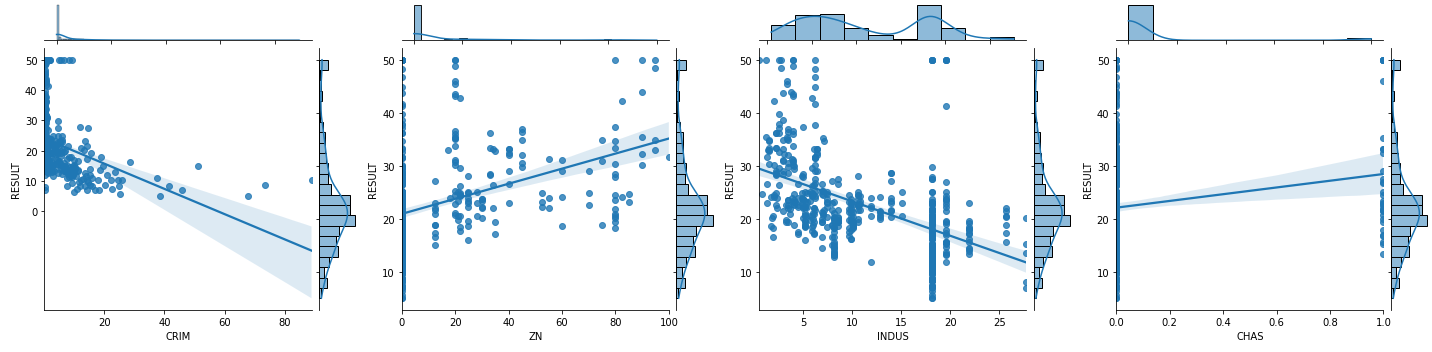

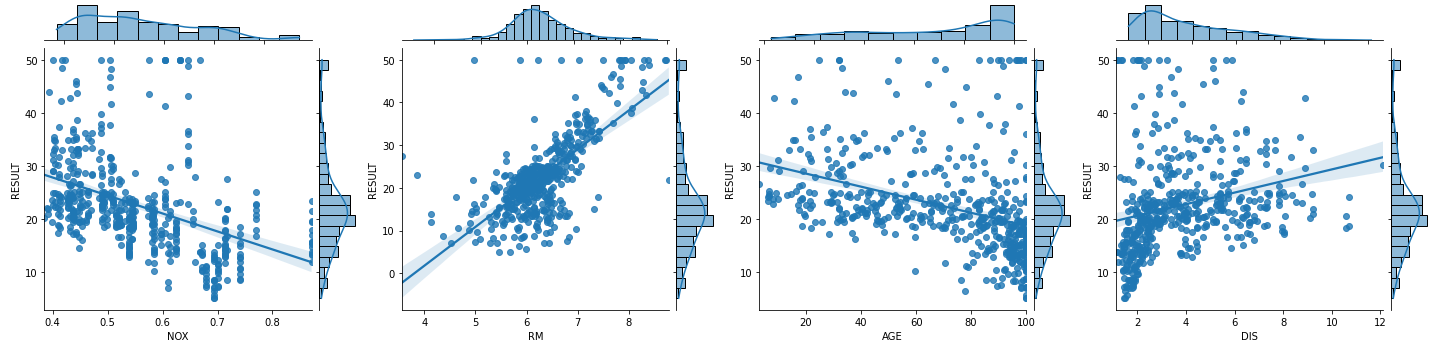

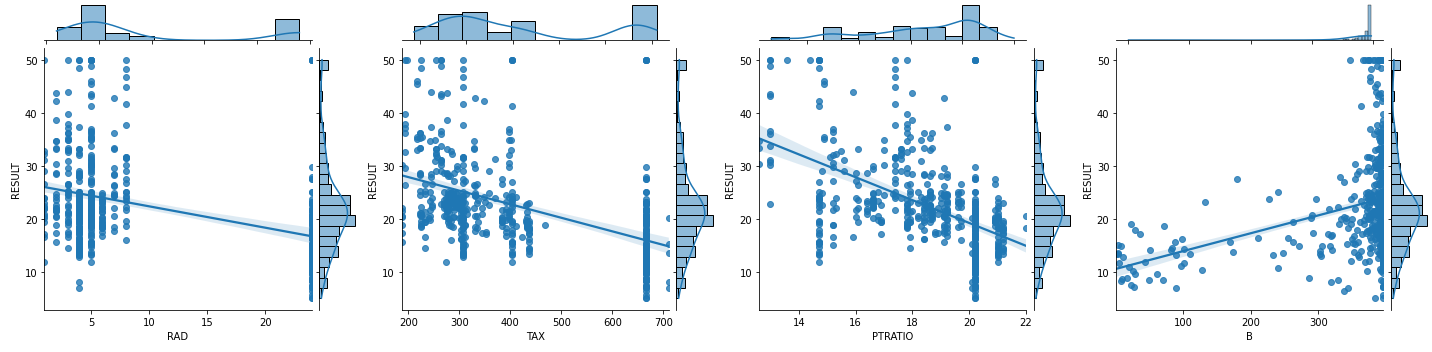

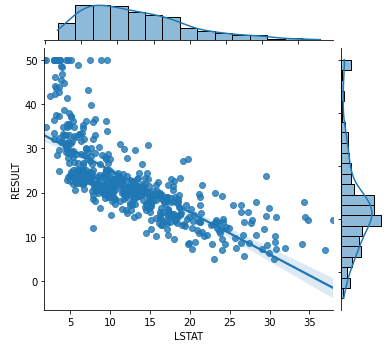

In [9]:
from libs.SeabornFig2Grid import SeabornFig2Grid
import matplotlib.gridspec as gridspec
for i in range(math.ceil(len(df_feature.columns)/4)):
  fig=plt.figure(figsize=(20,5))
  gs=gridspec.GridSpec(1, 4)
  for j in range(4):
    try:
      fig_tmp=sns.jointplot(x=list(df_feature)[(4*i+j)],y = TARGET,data=df,kind='reg')
      mg=SeabornFig2Grid(fig_tmp, fig, gs[j])
    except IndexError:
      continue     
  gs.tight_layout(fig)
  plt.show()


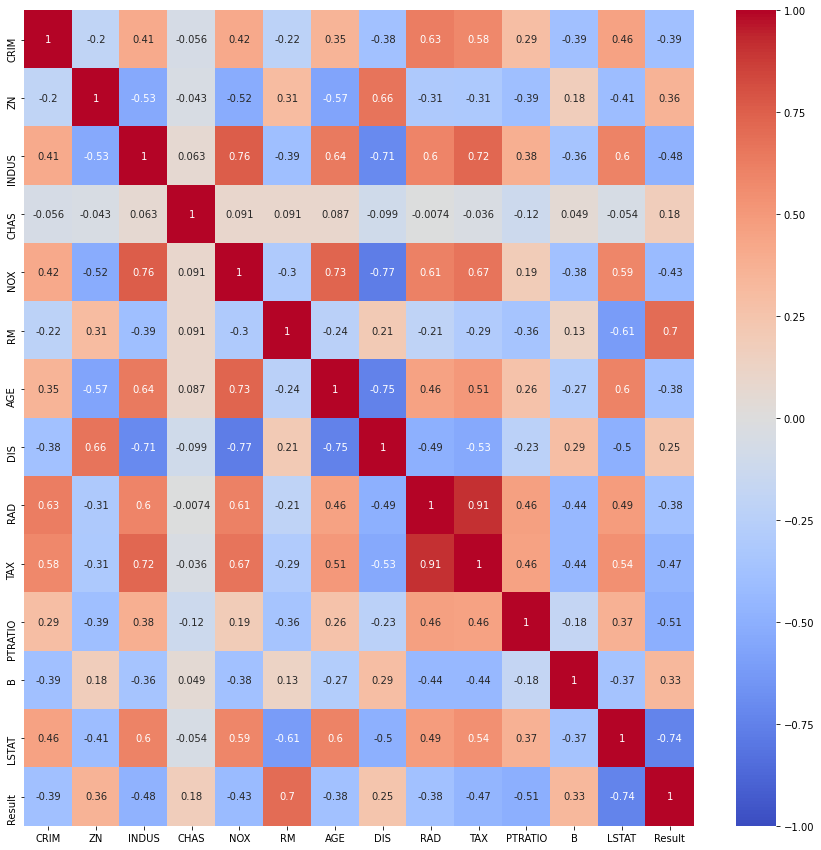

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

資料分群與分群後標準化


In [ ]:
#Training set & Testing set
X=df[df.columns[:-1]].values
Y=df[df.columns[-1]].values
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2, random_state=0)
X.mean()
#StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(train_X)
train_X_std=sc.transform(train_X)
test_X_std=sc.transform(test_X)

In [ ]:
def training(method):
  regressor = method
  regressor.fit(train_X, train_Y)
  print(regressor.fit(train_X, train_Y))

  pred_Y = regressor.predict(test_X)
  df_pred = pd.DataFrame({'Actual': test_Y, 'Predicted': pred_Y}).round(3)
  df_pred = df_pred.sort_values(by='Actual')
  max_value=max([df_pred['Actual'].max(),df_pred['Predicted'].max()])
  

  plt.scatter(df_pred['Actual'],df_pred['Predicted'])
  plt.plot([0,max_value],[0,max_value])
  plt.xlabel('Actual data')
  plt.ylabel('Predict data')
  plt.show()

  df_pred.plot(kind='bar',figsize=(15,3))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.xticks([],[])
  plt.show()

  print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, pred_Y))  
  print('Mean Squared Error:', metrics.mean_squared_error(test_Y, pred_Y))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, pred_Y)))
  print('Predict Score:',regressor.score(train_X, train_Y))

線性迴歸

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
38.09169492630284


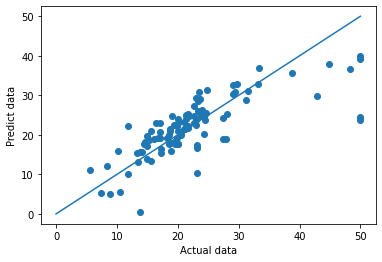

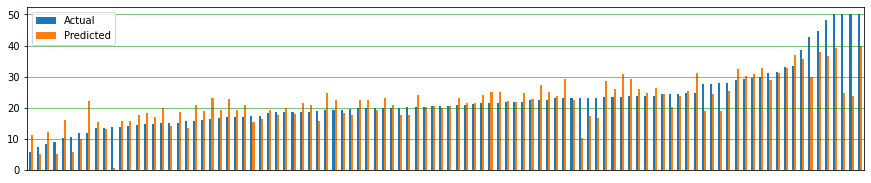

Mean Absolute Error: 3.8429092204444975
Mean Squared Error: 33.448979997676496
Root Mean Squared Error: 5.783509315085133
Predict Score: 0.7730135569264233


In [ ]:
from sklearn.linear_model import LinearRegression
training(LinearRegression())

正則化(Ridge)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scoring = 'neg_mean_squared_error'
seed = 7
model = Ridge(alpha=1.0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.07824620925932


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM(SVR)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[13.15152895]


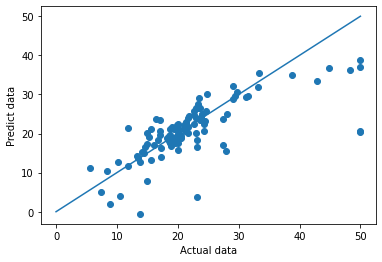

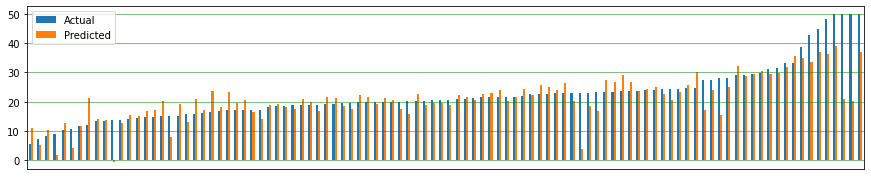

Mean Absolute Error: 3.784665092489705
Mean Squared Error: 39.41504943346572
Root Mean Squared Error: 6.27814060319341
Predict Score: 0.7485006808906234


In [ ]:
from sklearn.svm import SVR
training(SVR(kernel='linear'))

Dicision Trees

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


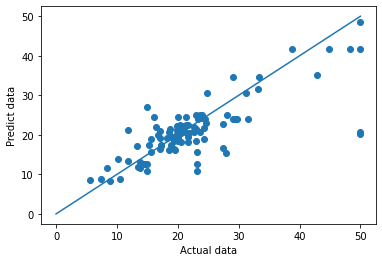

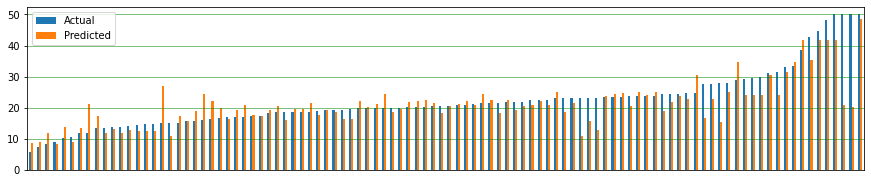

Mean Absolute Error: 3.5176470588235293
Mean Squared Error: 33.8278431372549
Root Mean Squared Error: 5.81617083116159
Predict Score: 1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
training(DecisionTreeRegressor())

Ramdom Forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


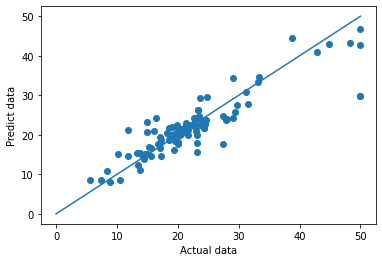

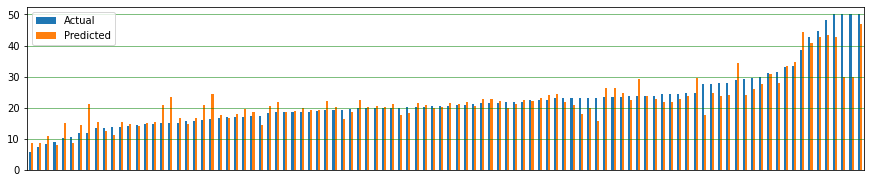

Mean Absolute Error: 2.634098039215687
Mean Squared Error: 17.685549901960794
Root Mean Squared Error: 4.205419111332519
Predict Score: 0.9844878967905617


In [ ]:
from sklearn.ensemble import RandomForestRegressor
training(RandomForestRegressor())

MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


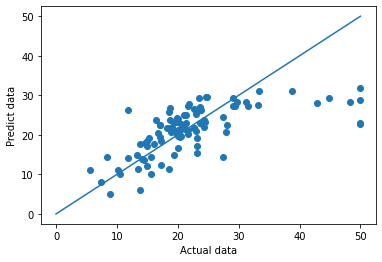

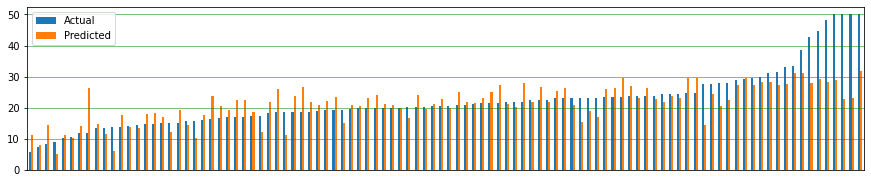

Mean Absolute Error: 4.5534721139854195
Mean Squared Error: 47.216656951475414
Root Mean Squared Error: 6.871437764505724
Predict Score: 0.6648732739344068


In [ ]:
from sklearn.neural_network import MLPRegressor
training(MLPRegressor())

KNN

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


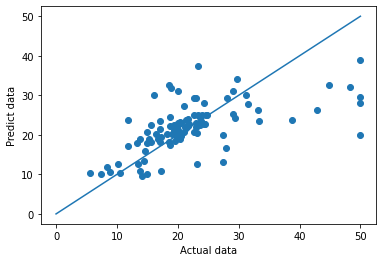

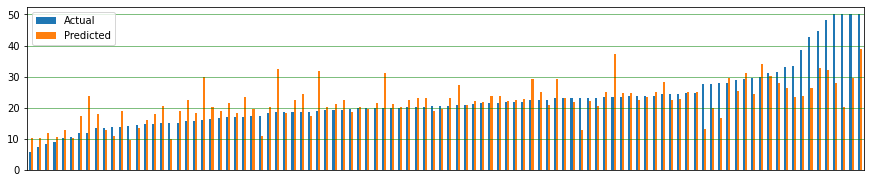

Mean Absolute Error: 4.756078431372549
Mean Squared Error: 51.74387450980392
Root Mean Squared Error: 7.193321521369938
Predict Score: 0.7133705462277412


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
training(KNeighborsRegressor())

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)


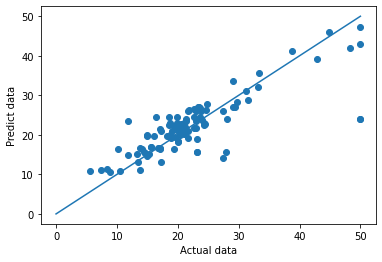

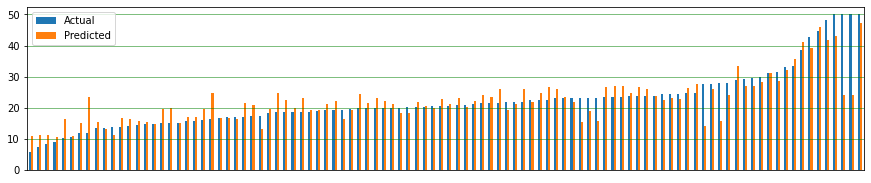

Mean Absolute Error: 3.262598937715639
Mean Squared Error: 26.9425069484009
Root Mean Squared Error: 5.190617203030955
Predict Score: 0.9233195463691984


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
training(AdaBoostRegressor())

regressor model   
https://scikit-learn.org/stable/search.html?q=regressor   

_____________________________________________
sklearn.base.is_regressor   
sklearn.base.RegressorMixin  
sklearn.compose.TransformedTargetRegressor  
sklearn.dummy.DummyRegressor   
sklearn.ensemble.AdaBoostRegressor   
sklearn.ensemble.BaggingRegressor    
sklearn.ensemble.ExtraTreesRegressor   
sklearn.ensemble.GradientBoostingRegressor   
sklearn.ensemble.HistGradientBoostingRegressor  
sklearn.ensemble.RandomForestRegressor  
sklearn.ensemble.StackingRegressor  
sklearn.ensemble.VotingRegressor  
sklearn.gaussian_process.GaussianProcessRegressor   
sklearn.linear_model.GammaRegressor  
sklearn.linear_model.HuberRegressor  
sklearn.linear_model.PassiveAggressiveRegressor  
sklearn.linear_model.PoissonRegressor   
sklearn.linear_model.RANSACRegressor   
sklearn.linear_model.SGDRegressor   
sklearn.linear_model.TheilSenRegressor   
sklearn.linear_model.TweedieRegressor   
sklearn.multioutput.MultiOutputRegressor   
sklearn.multioutput.RegressorChain   
sklearn.neighbors.KNeighborsRegressor   
sklearn.neighbors.RadiusNeighborsRegressor   
sklearn.neural_network.MLPRegressor   
sklearn.tree.DecisionTreeRegressor   
sklearn.tree.ExtraTreeRegressor   

score為負值修正:
https://blog.csdn.net/weixin_42868552/article/details/86683635
